<h1 align="center">Machine Learning for Bioinformatics</h1>
<h3 align="center">Freie Universität Berlin - SoS 2024</h3>
<h5 align="center">Exercise Notebook 07 - Regression</h5>
<hr style="border:2px solid gray">

### Import python packages
---

In [1]:
import gzip
import pickle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import LeaveOneOut, GridSearchCV, KFold, ShuffleSplit
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge

---
# Assignment 1: From polynomial regression to kernel regression
---
The following defines a simple data set with 25 samples for testing polynomial regression:

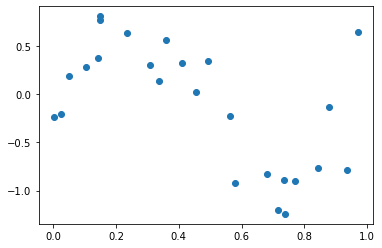

In [2]:
data = np.array([
    0.001399613, -0.23436656,
    0.971629779,  0.64689524,
    0.579119475, -0.92635765,
    0.335693937,  0.13000706,
    0.736736086, -0.89294863,
    0.492572335,  0.33854780,
    0.737133774, -1.24171910,
    0.563693769, -0.22523318,
    0.877603280, -0.12962722,
    0.141426545,  0.37632006,
    0.307203910,  0.30299077,
    0.024509308, -0.21162739,
    0.843665029, -0.76468719,
    0.771206067, -0.90455412,
    0.149670258,  0.77097952,
    0.359605608,  0.56466366,
    0.049612895,  0.18897607,
    0.409898906,  0.32531750,
    0.935457898, -0.78703491,
    0.149476207,  0.80585375,
    0.234315216,  0.62944986,
    0.455297119,  0.02353327,
    0.102696671,  0.27621694,
    0.715372314, -1.20379729,
    0.681745393, -0.83059624 ]).reshape(25,2)
y = data[:,1]
X = data[:,0:1]

plt.scatter(X[:,0], y)
plt.show()

---
# 1.1 Polynomial features
---
The function *compute_polynomial_features* takes as input a vector $x \in \mathbb{R}^n$ and returns a matrix $F$ of $p$ features, where column $k$ corresponds to $x^{k-1}$, $k = 1, 2, \dots, p$

In [11]:
def compute_polynomial_features(X, degree):
    # degree = p+1
    x = X if len(X.shape) == 1 else X[:,0]
    # Complete the implementation
    return F

---
# 1.2 Polynomial regression
---

We estimate the parameters $\theta$ of our (polynomial) regression model using $\ell_2$-penalized ordinary least squares (ridge regression):
$$
    \hat{\theta} = \mathrm{argmin}_\theta \left\Vert y - F \theta \right\Vert_2^2 + \alpha \left\Vert \theta \right\Vert_2^2
$$
which has the following analytical solution
$$
    \hat{\theta} = (F^\top F + \alpha I)^{-1} F^\top y
$$
The class *PolynomialRegression* implements this estimator:

In [90]:
class PolynomialRegression:
    def __init__(self, degree=1, alpha=0.0):
        self.degree = degree
        self.theta  = None
        self.alpha  = alpha
    
    def fit(self, X, y):
        # Please use *np.linalg.pinv* to compute matrix inverses

    def predict(self, X):
        # Complete the implementation

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

    def get_params(self, deep=True):
        return {"degree" : self.degree, "alpha" : self.alpha}

---
# 1.3 Performance of polynomial regression
---

The following shows a simple fit of a polynomial model on the entire data set:

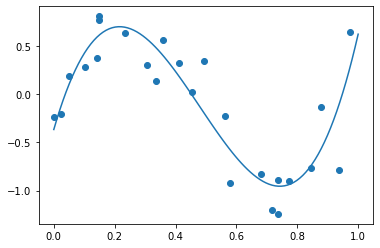

In [61]:
reg = PolynomialRegression(3, alpha=0)
reg.fit(X, y)

x_test = np.linspace(0,1,100)
plt.plot(x_test, reg.predict(x_test))
plt.scatter(X[:,0], y)
plt.show()

Now we test the performance of the polynomial regression model using *Leave One Out CV* (LOO-CV). We use $\alpha = 0.0$ and test all degrees from $1$ up to $10$. The result should show for each degree the average *mean squared error* (MSE):

In [ ]:
# Use GridSearchCV to implement LOO-CV parameter evaluation. Plot the result and draw a vertical line at the optimal parameters (degree).

---
# 1.4 Polynomial kernel regression
---

The *KernelPolynomialRegression* class implements the corresponding kernel version of our polynomial regression model.

In [87]:
class KernelPolynomialRegression:
    def __init__(self, degree=1, alpha=0.0):
        self.degree = degree
        self.eta    = None
        self.alpha  = alpha
        self.F      = None
    
    def fit(self, X, y):
        # Please use *np.linalg.pinv* to compute matrix inverses

    def predict(self, X):
        # Complete the implementation

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

    def get_params(self, deep=True):
        return {"degree" : self.degree, "alpha" : self.alpha}

The folloging shows a comparison of the the polynomal regression and the kernel version:

In [ ]:
reg1 = KernelPolynomialRegression(10, alpha=0.0)
reg1.fit(X, y)
reg2 = PolynomialRegression(10, alpha=0.0)
reg2.fit(X, y)

x_test = np.linspace(0,1,100)
plt.plot(x_test, reg1.predict(x_test), color='red')
plt.plot(x_test, reg2.predict(x_test))
plt.scatter(X[:,0], y)
plt.ylim(-2,2)
plt.show()

---
# 1.5 Performance comparison of polynomial kernel regression
---

We compare the performance of the kernel regression model to standard polynomial regression using LOO-CV. We use $\alpha = 0.0$ and test all degrees from $1$ up to $20$. Plot for both methods and each degree the average *mean squared error* (MSE):

---
# 1.5 Performance comparison of polynomial kernel regression with penalty
---

We fix the maximum degree to 15 and now test several penalty strengths, i.e.
$$
    \alpha = 0.001, 0.005, 0.01, 0.02, 0.05, 0.1
$$
Plot the performance of both polynomial and polynomial kernel regression using LOO-CV and MSE as error measure.

---
# Assignment 2: Prediction of gene expression from promoter sequences
---
### Import data
---

For importing the gene expression data, please make sure that you have an up to date version of pandas installed. We used version *1.4.2* for preparing the data. If this conflicts with your python environment, you might try to use a separate *conda environment* for our excercises.

In [2]:
path_to_training_file = 'exercise-08-data/gene_expression_liver_featurized.pkl.gz'

with gzip.open(path_to_training_file, 'rb') as f:
    X_raw, y_raw = pickle.load(f)

# Reduce data size
X_raw = X_raw[0:5000]
y_raw = y_raw[0:5000]

---
### Outlier removal and normalization
---

In [3]:
y_threshold = 10000

X = StandardScaler().fit_transform(X_raw[y_raw < y_threshold])
y = np.log(1.0 + y_raw[y_raw < y_threshold])

---
### Histogram
---

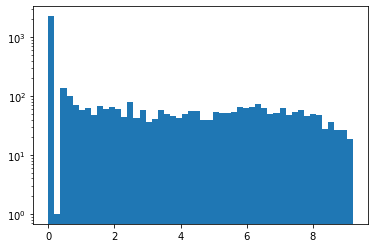

In [4]:
plt.hist(y, bins=50)
plt.yscale('log')
plt.show()

---
## 2.1 Performance of linear regression
---

As a first example, we evaluate the performance of a linear regression model. Please use *LinearRegression* from scikit-learn. We use the *KFold* class of scikit-learn to implement 5-fold CV with random shuffling of the data $(X, y)$ and a random state of 42 (in order to obtain comparable results). The final result should show the average $R^2$ over all 5 CV folds.

---
## 2.2 Performance of kernel regression
---

We now turn our attention to kernel regression and make use of the implementation in scikit-learn. We use the *KernelRidge* regressor in combination with the *rbf* kernel and keep $\gamma = 0.001$ fixed. The parameter $\alpha$ will be subject to optimization, for which we use *GridSearchCV* to test the following parameter values $\alpha = 0, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3$. The training procedure of kernel regression is too expensive for a fully-fledged k-fold CV. Instead, we use *ShuffleSplit* with only two splits, a training size of $1000$ samples and a random state of 42.